<a href="https://colab.research.google.com/github/vicaaa12/Deep-Neural-Networks/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import callbacks
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras import backend
from random import shuffle
from sklearn.model_selection import GridSearchCV
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, recall_score

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IntroductionNN/project4/bank-1.csv')

## Data Overview

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* RowNumber, CustomerId, Surname columns have unique values. We can drop these variables.
* Geography and Gender Columns are of the object type.

In [ ]:
#Checking the shape of the data
data.shape

(10000, 14)

* There are 10000 rows and 14 columns

In [ ]:
#finding the null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* We don't have any missing values in the data

In [ ]:
#Let's check for duplicate values in the data
data.duplicated().sum()

0

* We don't have duplicates

In [ ]:
#Let's create a copy
df = data.copy()

In [ ]:
#Let's check and remove unique columns from dataset

df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* RowNumber, CustomerId, Surname are unique. Hence we can drop these columns as it will not add any predictive power or value to the model

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
#Checking result
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

##Univariate Analysis

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


CreditScore:

The average credit score is approximately 650.53.
The credit scores range from a minimum of 350 to a maximum of 850.
The standard deviation is approximately 96.65, indicating some variability in credit scores.

Age:

The average age of customers in the dataset is around 38.92 years.
The age of customers ranges from a minimum of 18 years to a maximum of 92 years.
The standard deviation is approximately 10.49, indicating some variability in ages.

Tenure:

The average tenure (the number of years the customer has been with the bank) is approximately 5.01 years.
The tenure ranges from a minimum of 0 years to a maximum of 10 years.
The standard deviation is approximately 2.89, indicating some variability in tenure.

Balance:

The average balance in customer accounts is approximately 76,485.89.
Account balances range from a minimum of 0 to a maximum of 250,898.09.
The standard deviation is approximately 62,397.41, indicating significant variability in account balances.

NumOfProducts:

On average, customers have 1.53 products with the bank.
The number of products ranges from a minimum of 1 to a maximum of 4.
The standard deviation is approximately 0.58, indicating some variability in the number of products.

HasCrCard:

About 70.55% of customers have a credit card (HasCrCard = 1 on average).

IsActiveMember:

Approximately 51.51% of customers are active members (IsActiveMember = 1 on average).

EstimatedSalary:

The average estimated salary of customers is around 100,090.24.
Estimated salaries range from a minimum of 11.58 to a maximum of 199,992.48.
The standard deviation is approximately 57,510.49, indicating some variability in estimated salaries.

Exited:

On average, about 20.37% of customers have exited (Exited = 1)

####Credit score

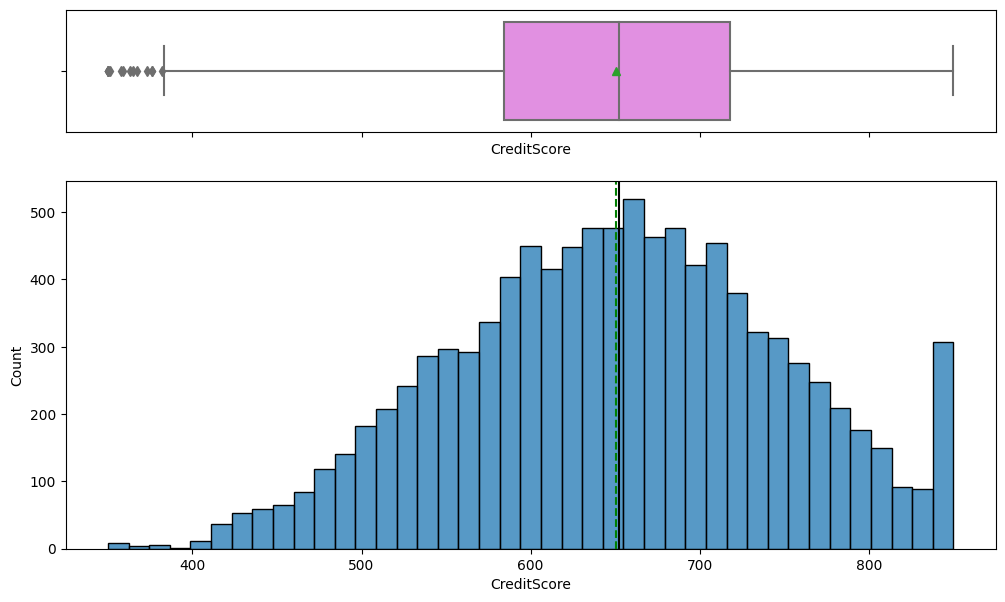

In [ ]:
histogram_boxplot(df, 'CreditScore')

* From the above plot, we observe that there are few outliers
* The 25th percentile is 584. This means that 25% of the credit scores in the dataset fall below 584
This means that 75% of the credit scores in the dataset fall below 718.

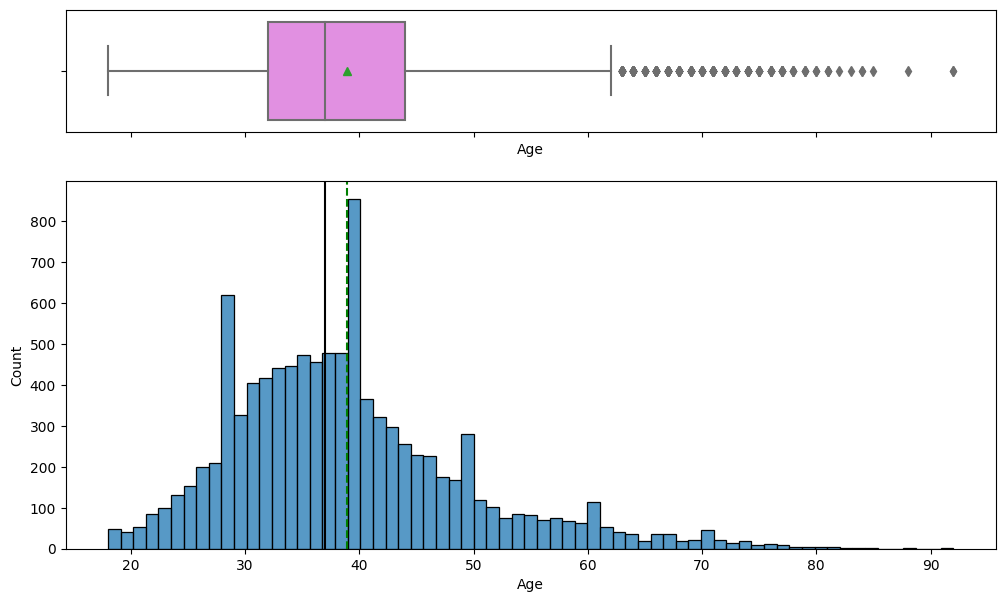

In [ ]:
histogram_boxplot(df, 'Age')

* From the plot, we observe there are multple outlier at the higher end, indicating right-skewed distribution.
* The distribution's center is around a median age of approximately 39 years old, and the oldest customer in the dataset is 92 years old
* The 75th percentile is 44. This means that 75% of the ages in the dataset fall below 44

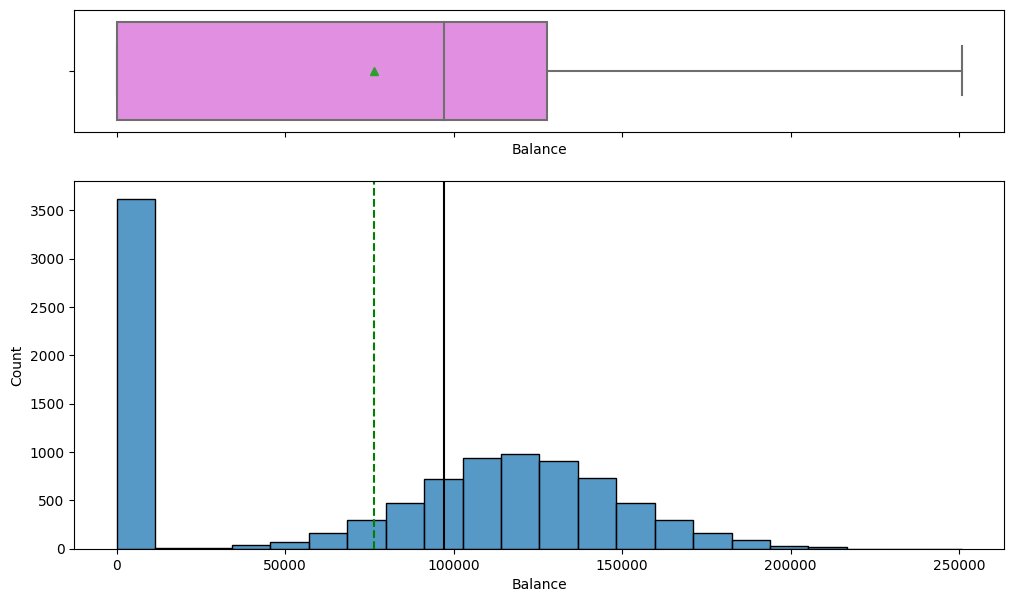

In [ ]:
histogram_boxplot(df, 'Balance')

* The 25th percentile is also 0, indicating that 25% of the account balances in the dataset fall below 0. This suggests a non-negligible portion of customers with low or negative balances.
* The 'Balance' feature exhibits a significant right-skewed distribution, as evidenced by the 25th percentile being 0.

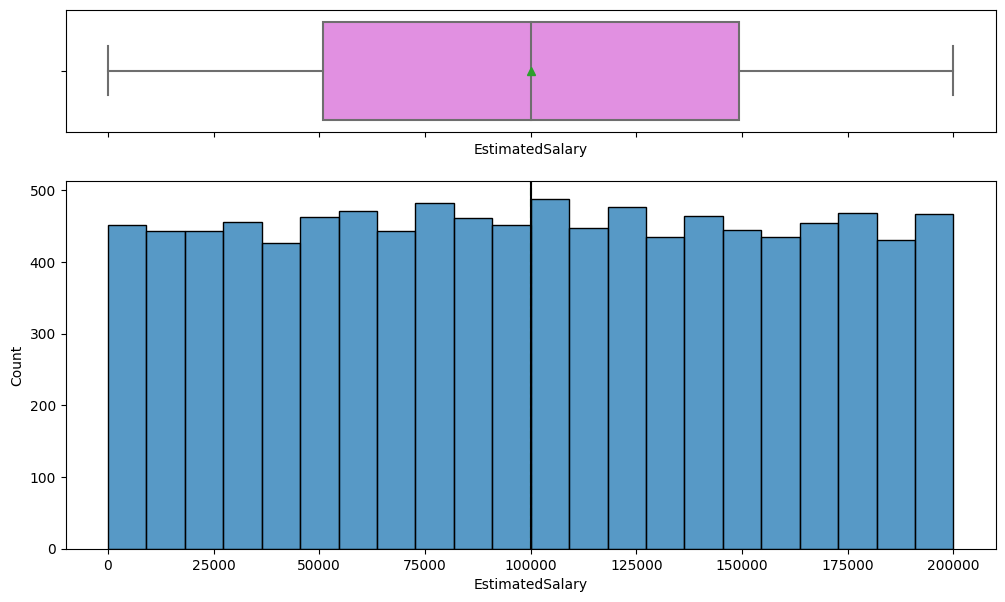

In [ ]:
histogram_boxplot(df, 'EstimatedSalary')

* The average estimated salary is approximately 100,090.24.
* The standard deviation is approximately 57,510.49. This indicates a notable degree of variability or dispersion in estimated salaries within the dataset.
* The 75th percentile is 149,388.25. This means that 75% of the estimated salaries in the dataset fall below this threshold, providing a measure of the upper range of salaries.

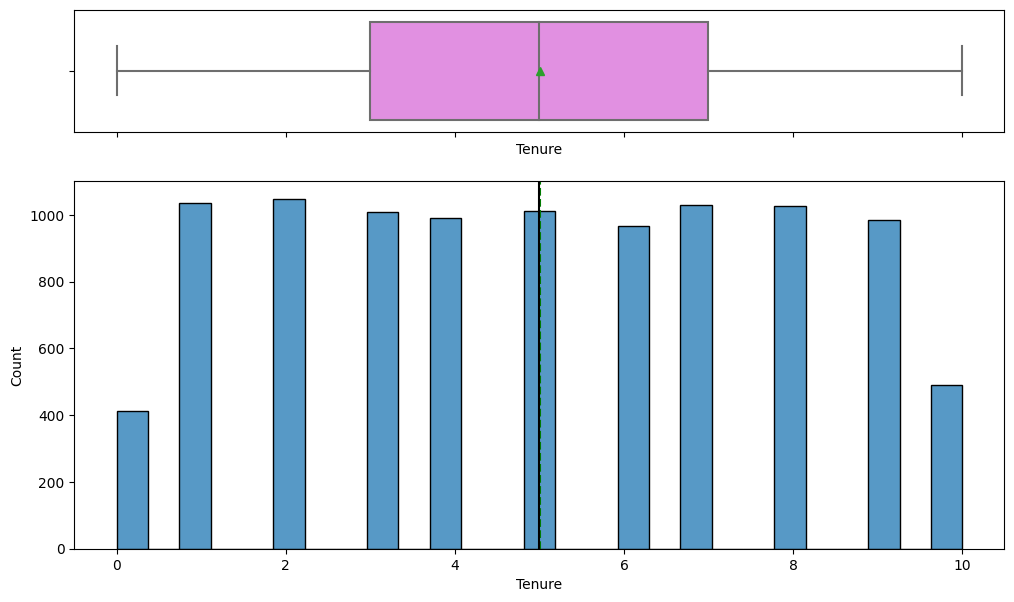

In [ ]:
histogram_boxplot(df, 'Tenure')

* The average tenure (number of years a customer has been with the bank) is approximately 5 years.
* The 25th percentile is 3, meaning that 25% of the customers in the dataset have a tenure of 3 years or less.
* The 75th percentile is 7, indicating that 75% of the customers have a tenure of 7 years or less.

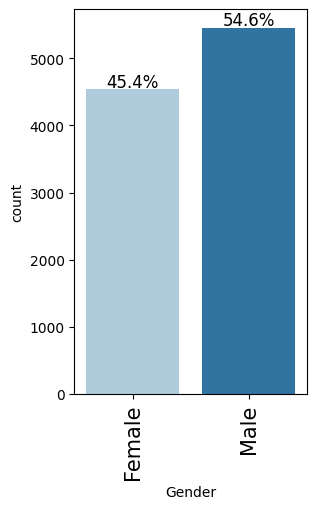

In [ ]:
labeled_barplot(df, "Gender", perc=True)

* There are more males in the dataset in comparison to females

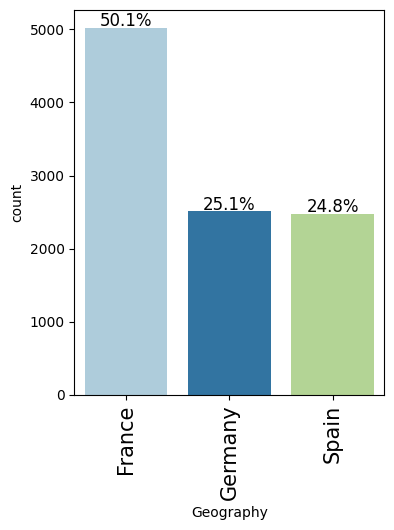

In [ ]:
labeled_barplot(df, "Geography", perc=True)

* Most customers are from France

0    7963
1    2037
Name: Exited, dtype: int64


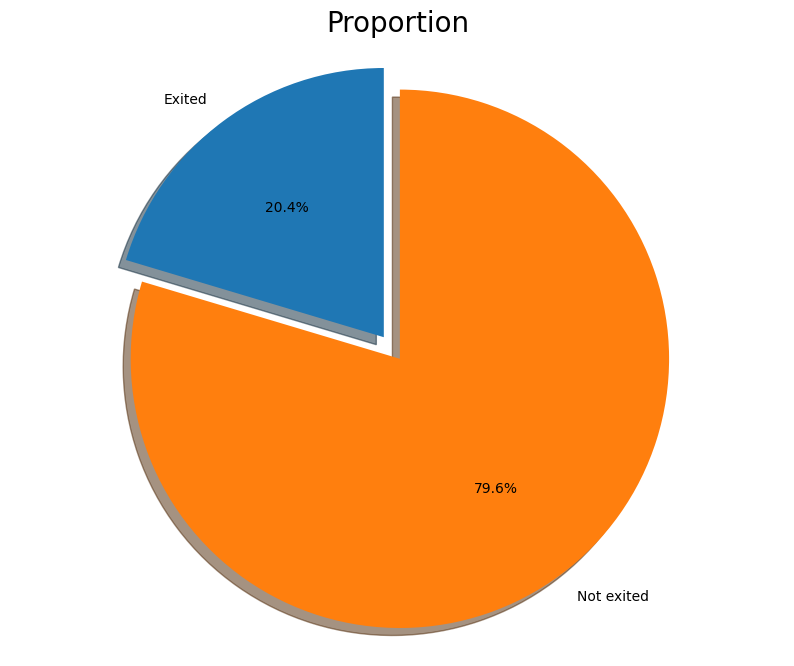

In [ ]:
print(df.Exited.value_counts())
labels = 'Exited', 'Not exited'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [df.Exited[df['Exited']==1].count(),df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distributian of classes is imbalanced for the taget variable
* Approximately 20% of customers have exited




### Bivariate Analysis

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Correlation Check

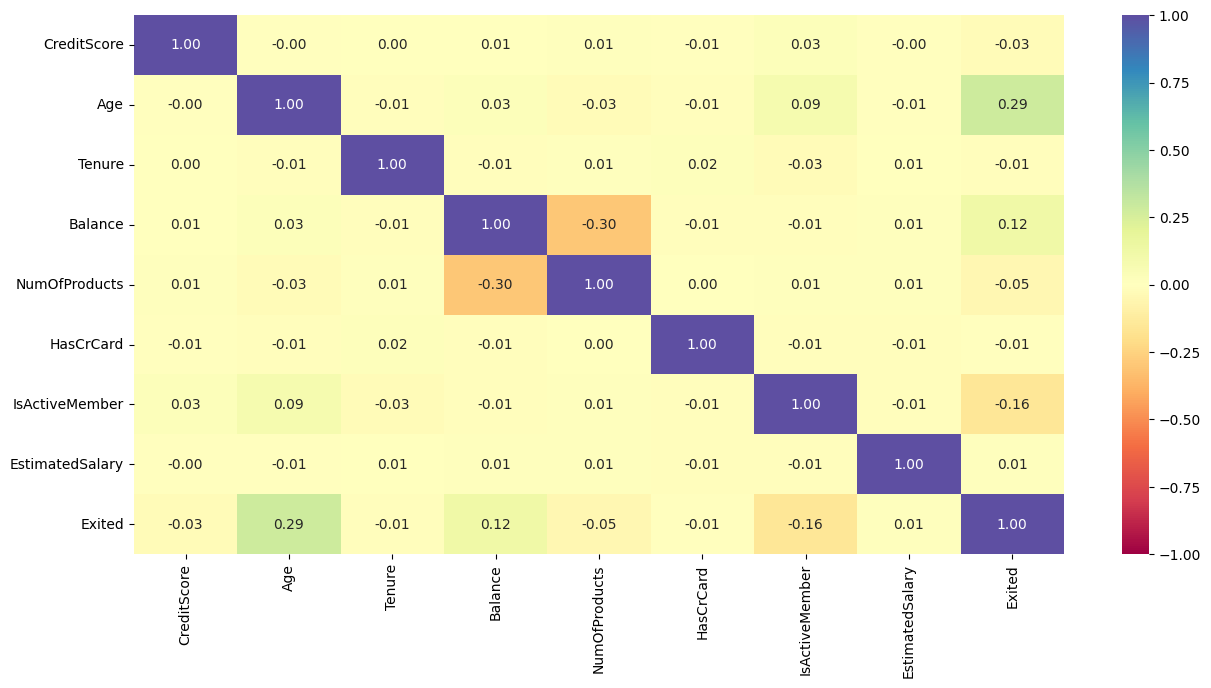

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is a modest correlation between 'Age' and the target variable, suggesting a slight influence on customer exits. Additionally, 'Exited' exhibits a slightly negative correlation with 'Balance' and 'NumOfProducts.

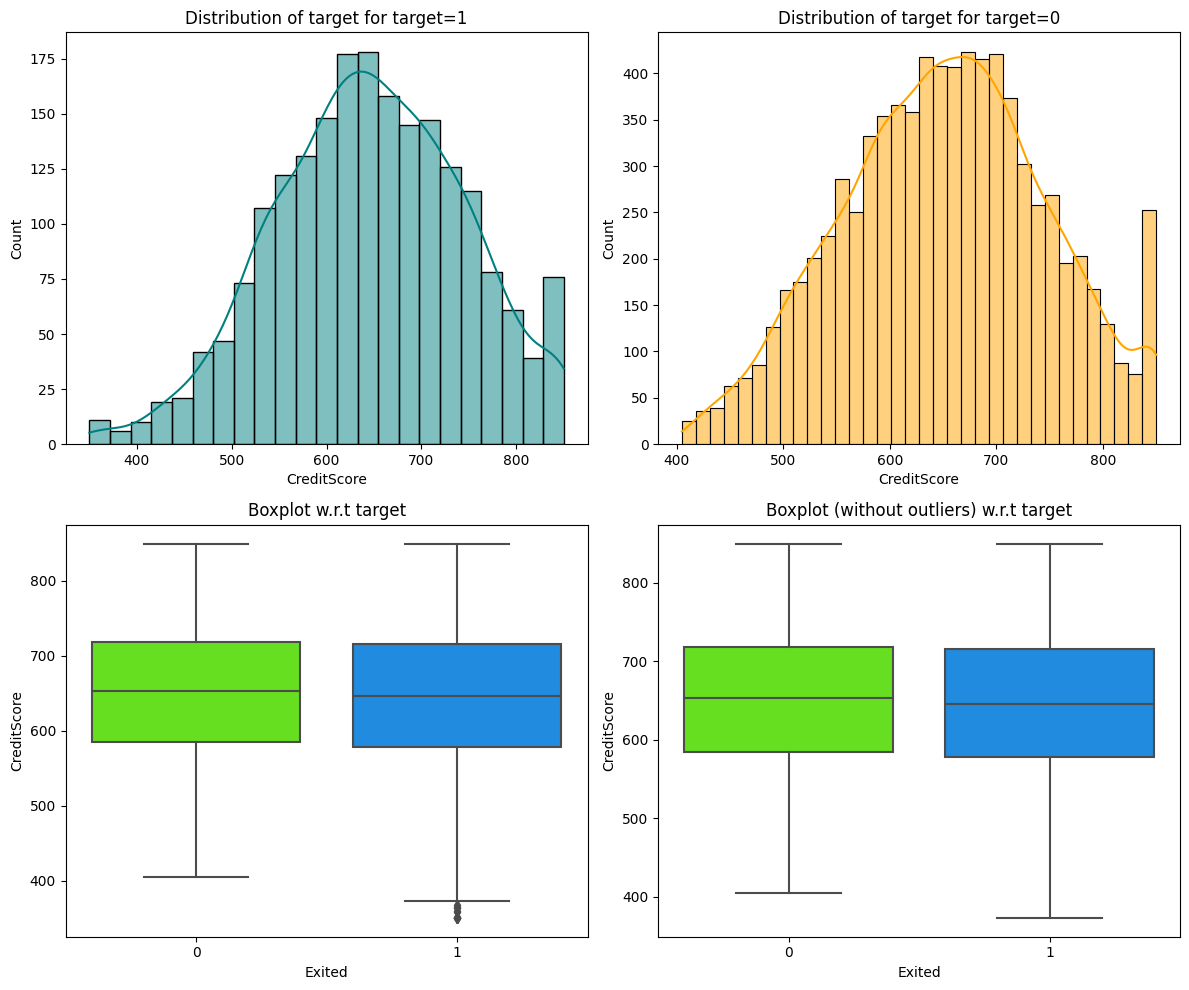

In [ ]:
distribution_plot_wrt_target(df, 'CreditScore', "Exited")

In [ ]:
df.groupby('Exited')['CreditScore'].median()

Exited
0    653.0
1    646.0
Name: CreditScore, dtype: float64

* For customers who have not exited, the median credit score is 653
For customers who have exited, the median credit score is 646
Customers who have not exited tend to have a slightly higher median credit score compared to those who have exited

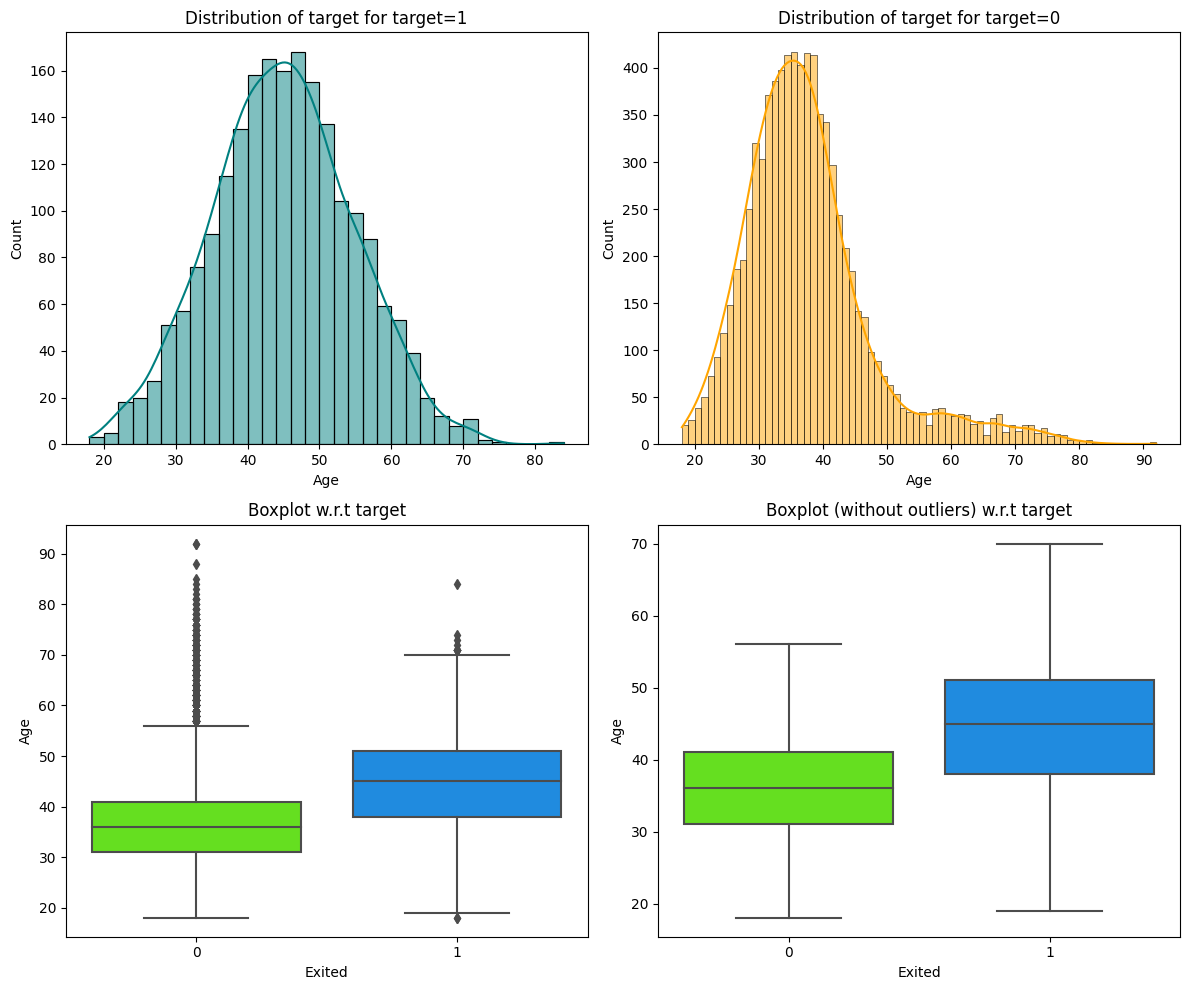

In [ ]:
distribution_plot_wrt_target(df, 'Age', "Exited")


* People who left the service were, on average, a bit older, around 44.84, compared to those who stayed, with an average age of around 37.41.  Additionally, the ages in the middle range (25th to 75th percentiles) for those who left were generally higher, indicating that this group tends to have older members. This indicates that customers who are older are more likely to exiting.

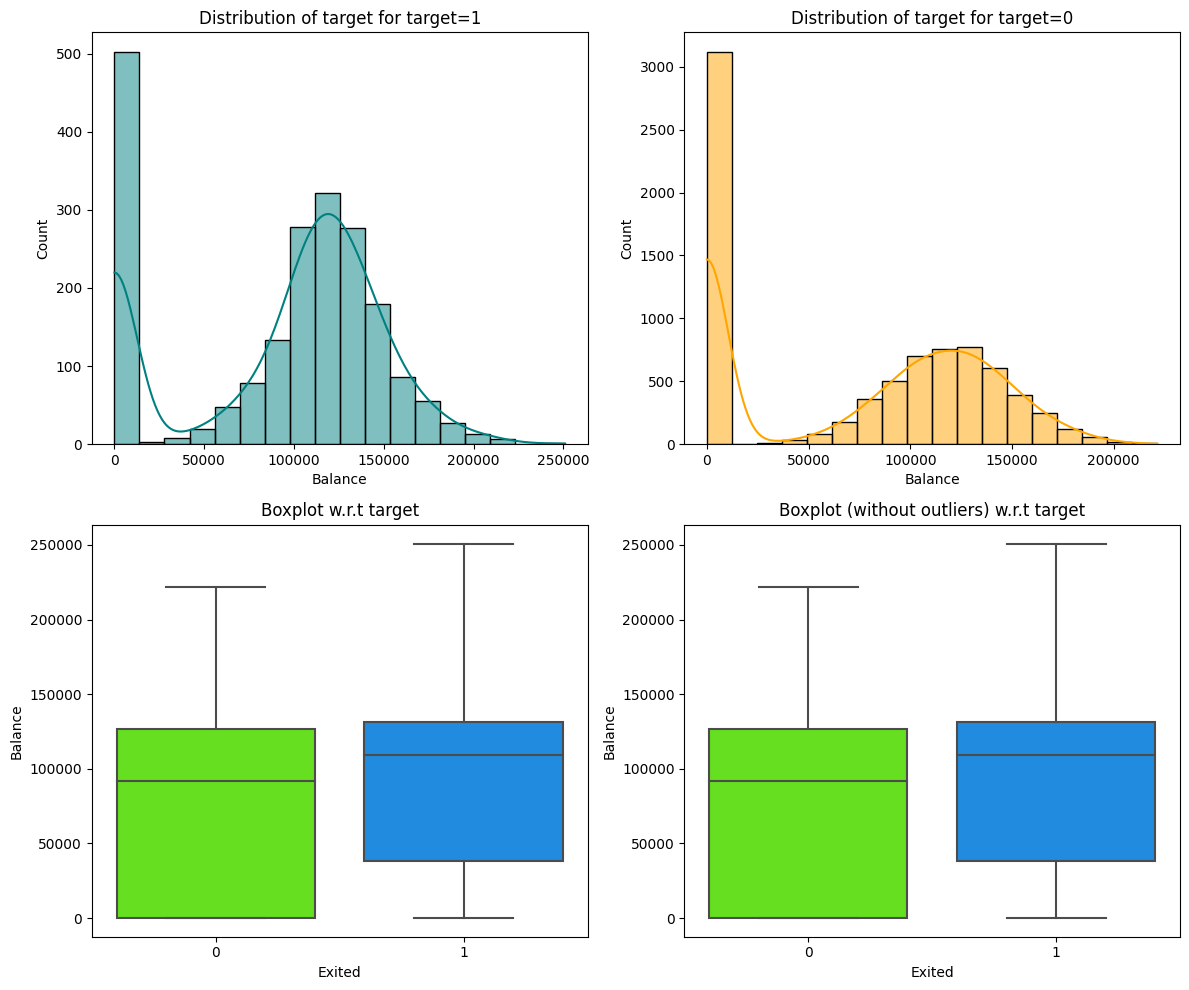

In [ ]:
distribution_plot_wrt_target(df, 'Balance', "Exited")

* On average, customers who have exited tend to have higher balances compared to those who have not exited.
* Among customers who have not exited, a notable portion (25%) has relatively low balances

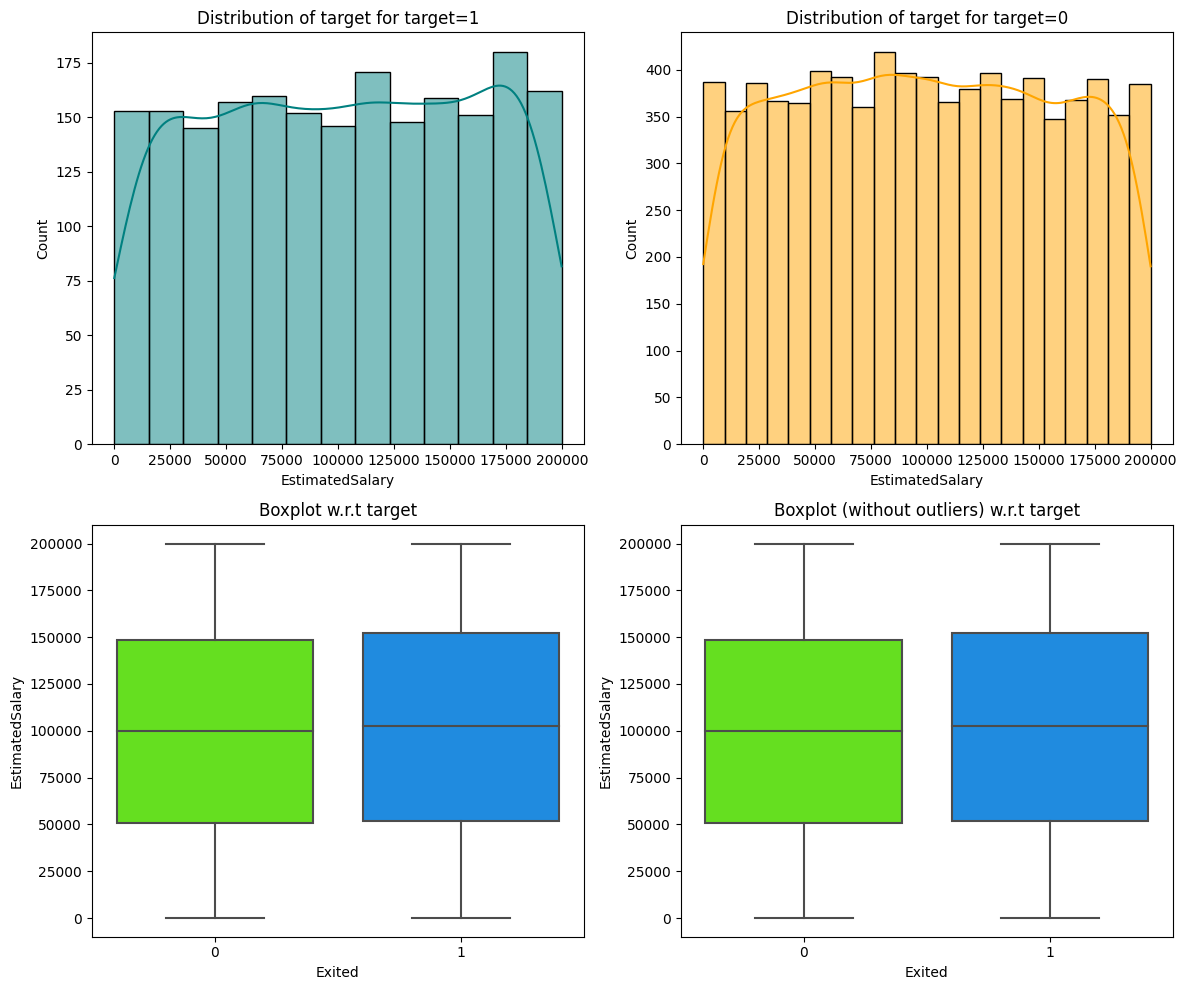

In [ ]:
distribution_plot_wrt_target(df, 'EstimatedSalary', "Exited")

This information indicates that, on average, customers who have exited tend to have slightly higher estimated salaries compared to those who have not exited.

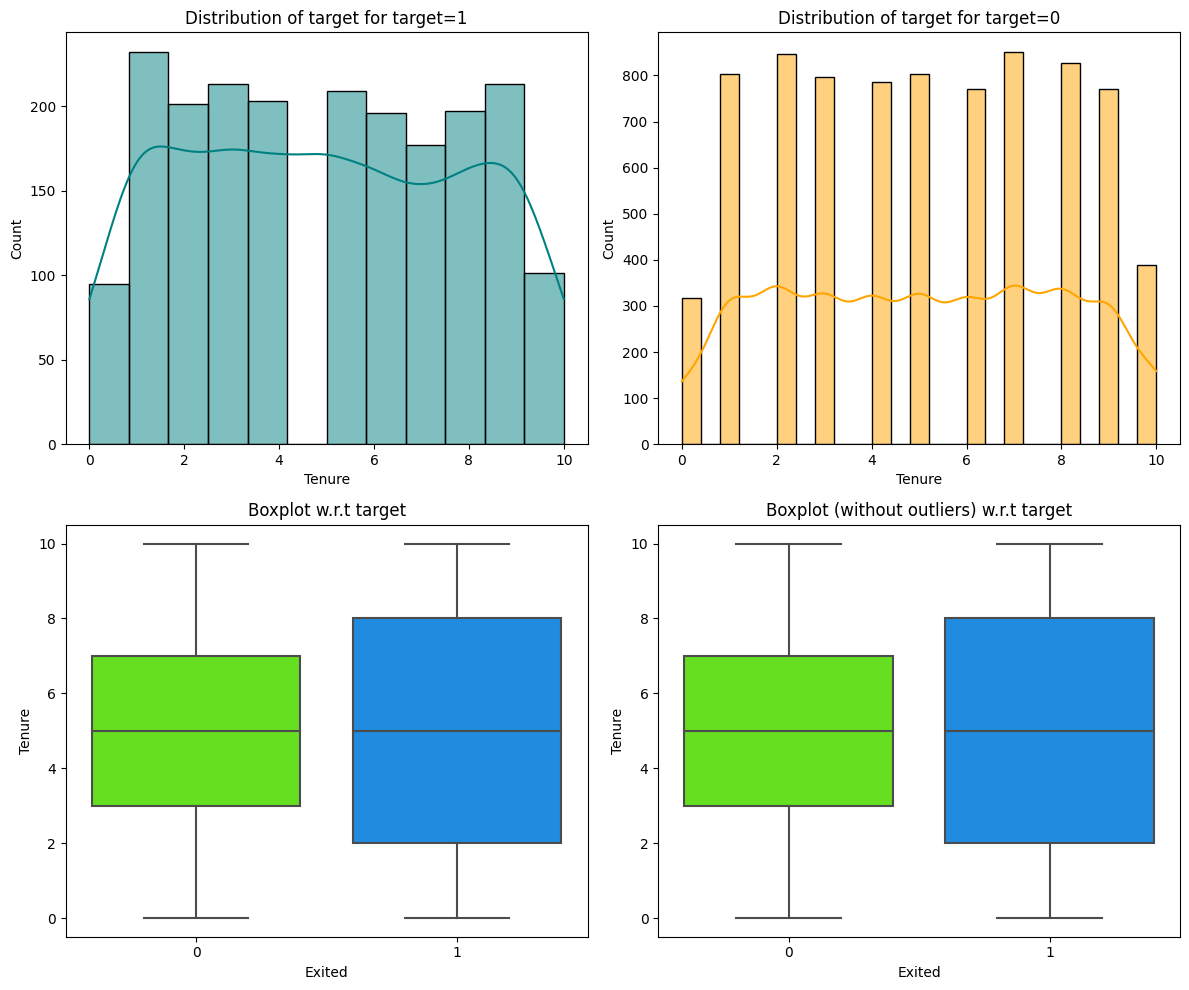

In [ ]:
distribution_plot_wrt_target(df, 'Tenure', "Exited")

 On average, customers who have not exited tend to have slightly longer tenure compared to those who have exited.

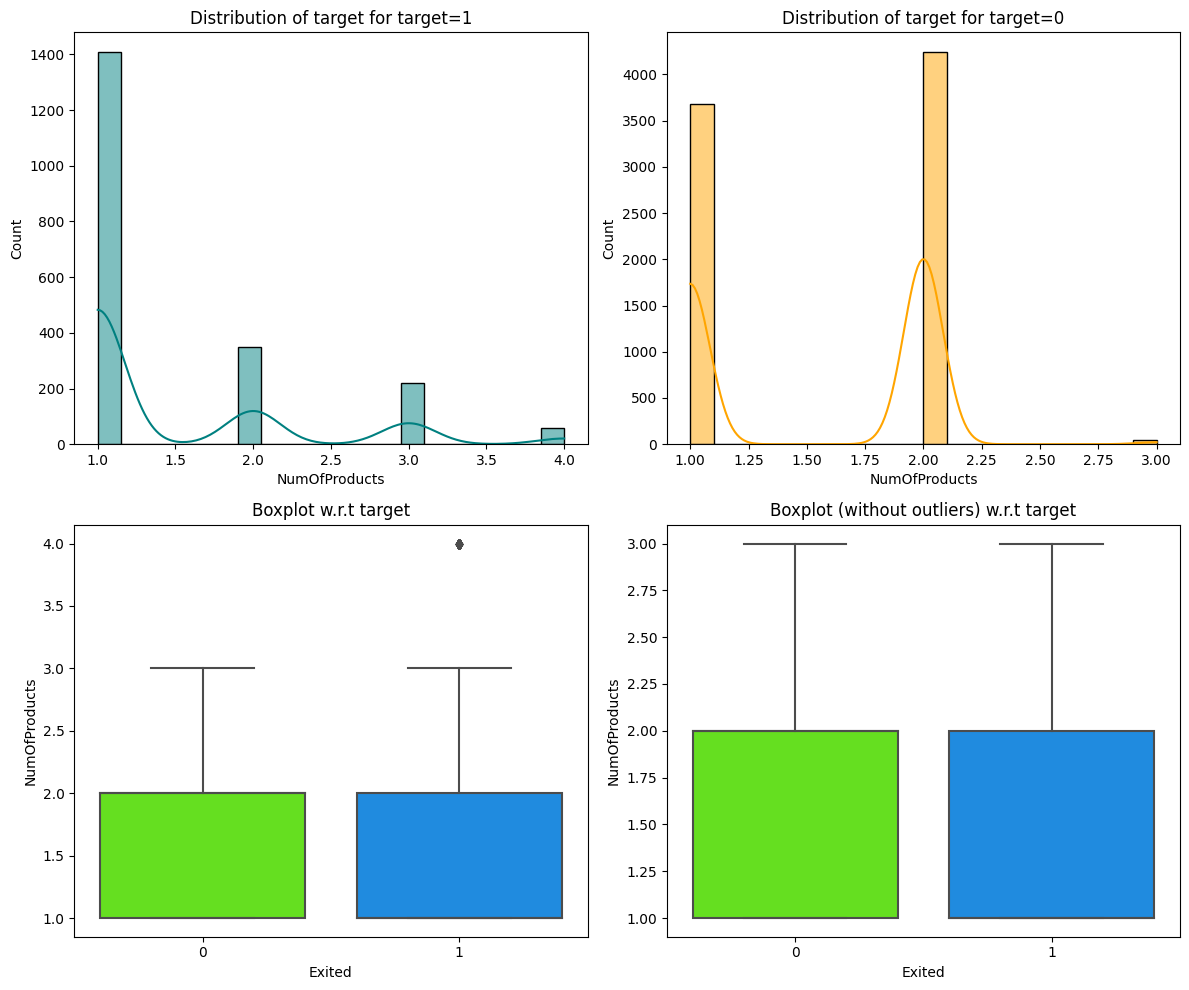

In [ ]:
distribution_plot_wrt_target(df, 'NumOfProducts', "Exited")

In [ ]:
df.groupby('Exited')['NumOfProducts'].mean()

Exited
0    1.544267
1    1.475209
Name: NumOfProducts, dtype: float64

Customers who haven't exited typically have a higher median number of products (2.0) compared to those who have exited (1.0). Additionally, the maximum quantity of products is also higher for exited customers in comparison to non-exited customers.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


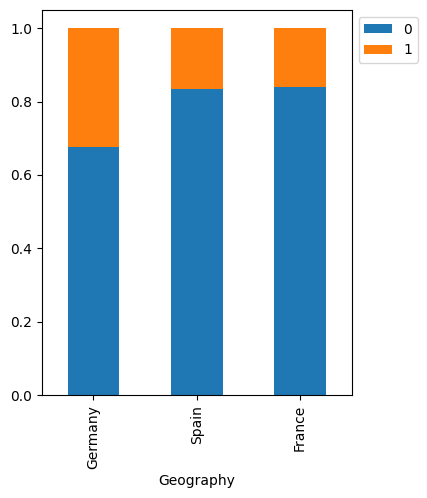

In [ ]:
stacked_barplot(df, "Geography", "Exited" )

* Germany: Among the 2,509 individuals in Germany, 814 individuals have exited, while 1,695 individuals have not.
* France: The dataset includes 5,014 individuals from France, with 810 individuals having exited and 4,204 individuals not having exited.
* Spain: For the 2,477 individuals in Spain, 413 individuals have exited, and 2,064 individuals have not.
* Most customers are located in France. Germany customers exhibit a slightly higher exit rate compared to other countries.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


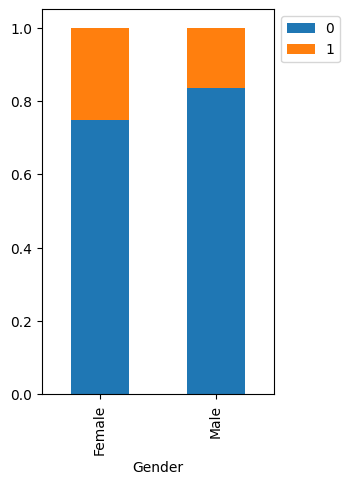

In [ ]:
stacked_barplot(df, "Gender", "Exited" )

* Female: Among the 4,543 female individuals, 1,139 have exited, while 3,404 have not.
* Male: For the 5,457 male individuals, 898 have exited, and 4,559 have not.
* Exit Distribution Across Genders:
The exit proportions differ between genders, indicating potential variations in exit decisions based on gender.

* The 'All' row highlights that, overall, 20.37% of individuals have exited, with a breakdown across genders.
* While females represent a smaller portion of the total population, they have a relatively higher exit rate (25.03%) compared to males (16.47%).

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


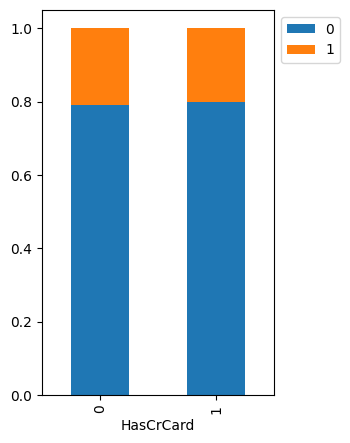

In [ ]:
stacked_barplot(df, "HasCrCard", "Exited" )

* Individuals without a credit card (20.81%) appear to have a slightly higher exit rate compared to those with a credit card (20.16%).

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


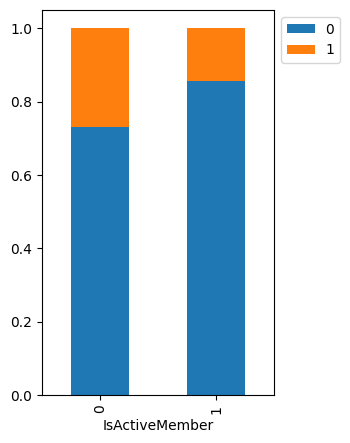

In [ ]:
stacked_barplot(df, 'IsActiveMember', "Exited")

* Inactive members have a relatively higher exit rate (26.84%) compared to active members (14.26%).

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
##Splitting Independent and dependent variable in X and Y respectively
X = df.drop(['Exited'], axis=1)
Y = df[['Exited']]

In [ ]:
print(X.shape)
print(Y.shape)
print(type(X))

(10000, 10)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify=Y, shuffle = True)

In [ ]:
# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.3, stratify=y_big, random_state = 5,shuffle = True)

In [ ]:
#checking the shape of train, validation and test data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(5600, 10)
(2000, 10)
(2400, 10)


Normalizing the train and test data separately

In [ ]:
# Scaling the data
sc = StandardScaler()

In [ ]:
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [ ]:
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])

In [ ]:
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

In [ ]:
X_val[columns_to_scale] = sc.transform(X_val[columns_to_scale])

In [ ]:
# Categorical Encoding
cat_data = ['Geography', 'Gender']

In [ ]:
X_train = pd.get_dummies(X_train, columns=cat_data, drop_first=True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)
X_val = pd.get_dummies(X_val,columns=cat_data,drop_first= True)

In [ ]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(5600, 11)
(2400, 11)
(5600, 1)
(2400, 1)
(2000, 11)
(2000, 1)


In [ ]:
#checking train set
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
47,-0.150537,0.002793,1.379539,0.985241,1,1,1,0.314803,1,0,0
6627,-0.967828,0.191206,0.344561,-1.232793,1,1,1,0.769538,0,0,0
7828,0.852971,0.096999,1.379539,1.613929,1,1,1,-1.521190,0,0,0
367,-1.981683,-0.374034,1.034546,0.420435,2,1,1,1.570928,1,0,0
4817,-0.119501,-1.033479,0.689554,-1.232793,2,1,1,0.550820,0,0,1


In [ ]:
#checking valdation set
X_val.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9785,-2.033410,-1.127686,-0.000431,1.275445,2,0,0,-0.505741,0,0,0
3654,-1.133355,-0.562447,1.034546,1.066137,2,0,0,-0.383785,1,0,1
4395,0.087408,-1.787132,0.344561,1.465422,1,1,0,-0.730723,0,0,0
448,0.242590,-0.091414,0.344561,-0.137552,1,0,0,0.685320,0,0,0
8980,-0.016047,-0.374034,-0.690416,1.438017,2,1,1,-1.316563,1,0,0


In [ ]:
#checking test set
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5702,-0.688501,-0.279827,0.689554,-1.232793,2,1,0,-0.093994,0,0,1
3667,-1.309228,-0.562447,-0.345424,0.875500,2,0,0,-0.780763,1,0,1
1617,-0.978174,0.096999,-0.345424,-1.232793,2,0,1,0.101307,0,1,0
5673,-0.129847,-0.468240,-0.000431,1.010172,2,0,0,-1.150732,0,1,1
4272,-0.119501,-0.468240,-0.690416,0.019512,1,1,1,1.206706,0,1,0


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

### Model Building: Neural Network

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
def create_model_1():
 model_1 = Sequential()
 model_1.add(Dense(activation = 'relu', input_dim = X_train.shape[1], kernel_initializer='he_uniform', units=32))
 model_1.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
 model_1.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
 model_1.add(Dense(1, activation = 'sigmoid'))
 optimizer = SGD(lr=0.007, momentum=0.8)
 model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
 return model_1

In [ ]:
model_1 = create_model_1()

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

In [ ]:
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es_cb])

Epoch 1/100
88/88 [==============================] - 2s 8ms/step - loss: 0.6209 - accuracy: 0.7066 - val_loss: 0.5243 - val_accuracy: 0.7962
Epoch 2/100
88/88 [==============================] - 0s 5ms/step - loss: 0.5114 - accuracy: 0.7962 - val_loss: 0.5025 - val_accuracy: 0.7962
Epoch 3/100
88/88 [==============================] - 1s 6ms/step - loss: 0.4943 - accuracy: 0.7962 - val_loss: 0.4872 - val_accuracy: 0.7971
Epoch 4/100
88/88 [==============================] - 0s 6ms/step - loss: 0.4741 - accuracy: 0.7957 - val_loss: 0.4701 - val_accuracy: 0.7937
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4518 - accuracy: 0.7977 - val_loss: 0.4584 - val_accuracy: 0.7908
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4361 - accuracy: 0.7991 - val_loss: 0.4529 - val_accuracy: 0.7992
Epoch 7/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4276 - accuracy: 0.8030 - val_loss: 0.4502 - val_accuracy: 0.8000
Epoch 8/100
8

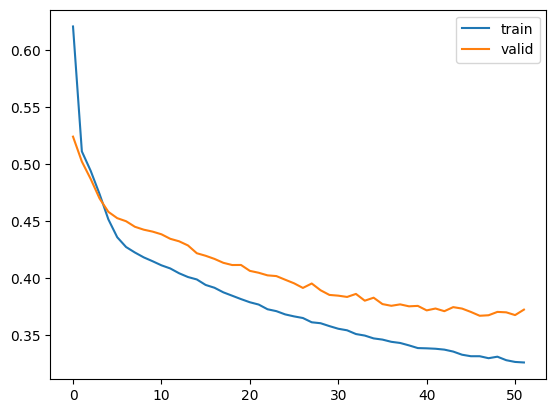

In [ ]:
#Capturing lraning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [ ]:
y_pred=model_1.predict(X_val)

75/75 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[0.13837191],
       [0.09072691],
       [0.29810464],
       ...,
       [0.48109207],
       [0.02365887],
       [0.19089724]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
recall = recall_score(y_val, y_pred)

In [ ]:
recall

0.5357873210633947

In [ ]:
cm=confusion_matrix(y_val, y_pred)

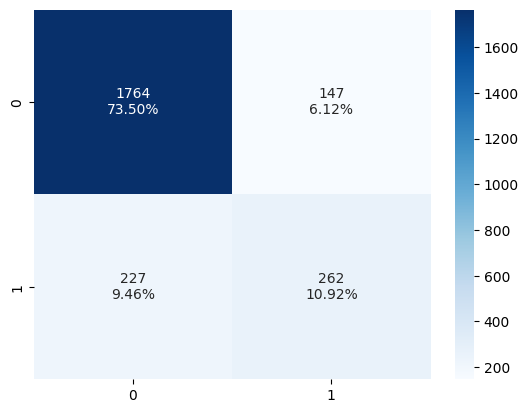

In [ ]:
make_confusion_matrix(cm)

In [ ]:
cr=metrics.classification_report(y_val,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1911
           1       0.64      0.54      0.58       489

    accuracy                           0.84      2400
   macro avg       0.76      0.73      0.74      2400
weighted avg       0.84      0.84      0.84      2400



In this context, approximately 6% of False Negatives is attributed to the use of a fixed threshold of 0.5 in our model. Given the imbalanced nature of the dataset, a more optimal threshold should be calculated using the AUC-ROC curve.
Let's try to  tune the decision threshold in order to improve the model's performance. We will select the threhold with the largest G-Mean value

In [ ]:
 # predict probabilities
 def auc_curve_threhold (model, x_data, y_data):
  # predict probabilities
    yhat1 = model.predict(x_data)
# keep probabilities for the positive outcome only
    yhat1 = yhat1[:, 0]
# calculate roc curves
    fpr, tpr, thresholds1 = roc_curve(y_data, yhat1)
# calculate the g-mean for each threshold
    gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
    ix = np.argmax(gmeans1)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
# show the plot
    plt.show()

# Predicting the results using the best threshold on the validation set
    y_pred=model.predict(X_val)
    y_pred1 = (y_pred > thresholds1[ix])
# Display classification report
    cr=metrics.classification_report(y_val,y_pred1)
    print(cr)
    test=confusion_matrix(y_val, y_pred1)
    cm=confusion_matrix(y_val, y_pred1)
    make_confusion_matrix(cm)



175/175 [==============================] - 1s 3ms/step
Best Threshold=0.253394, G-Mean=0.795


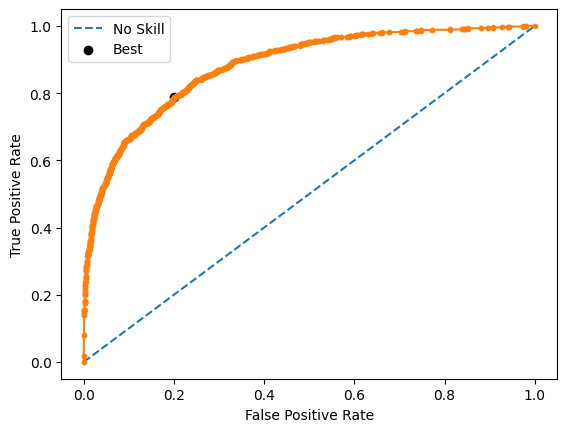

75/75 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1911
           1       0.46      0.72      0.56       489

    accuracy                           0.77      2400
   macro avg       0.69      0.75      0.70      2400
weighted avg       0.82      0.77      0.79      2400



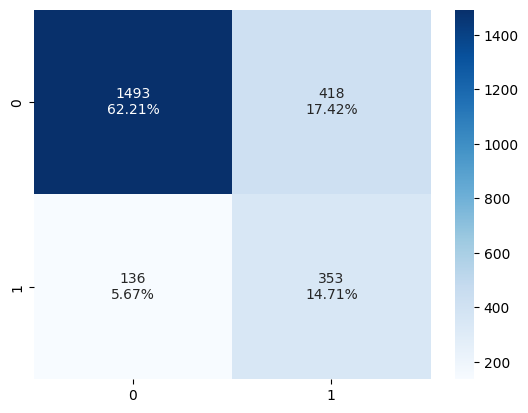

In [ ]:
auc_curve_threhold(model_1, X_train, y_train);

The strategic utilization of the AUC curve and threshold adjustment has been employed to enhance the model's recall value. Recall value increased.  In the model optimization process, we initially utilized stochastic gradient descent with momentum and a low learning rate. Early stopping parameters were implemented to prevent overfitting, resulting in the model concluding training for 52 epochs. As part of our ongoing efforts to enhance performance, we will use Adam optimizer

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model(lr):
      ## Initializing the neural network
      model = Sequential()

      ##Complete the code to add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))

      ## Complete the code to add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu', kernel_initializer='he_uniform'))
      ## Complete the code to add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      ## Complete the code to initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(lr)

      ## Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
model2=create_model(lr=0.01)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2=model2.fit(X_train, y_train, batch_size=64, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
88/88 [==============================] - 2s 9ms/step - loss: 0.4349 - accuracy: 0.8152 - val_loss: 0.4232 - val_accuracy: 0.8179
Epoch 2/100
88/88 [==============================] - 1s 6ms/step - loss: 0.4022 - accuracy: 0.8309 - val_loss: 0.4106 - val_accuracy: 0.8167
Epoch 3/100
88/88 [==============================] - 1s 6ms/step - loss: 0.3865 - accuracy: 0.8379 - val_loss: 0.3883 - val_accuracy: 0.8429
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8450 - val_loss: 0.3865 - val_accuracy: 0.8379
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.3631 - accuracy: 0.8514 - val_loss: 0.3851 - val_accuracy: 0.8438
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 0.3579 - accuracy: 0.8545 - val_loss: 0.3624 - val_accuracy: 0.8462
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8582 - val_loss: 0.3666 - val_accuracy: 0.8512
Epoch 8/100
8

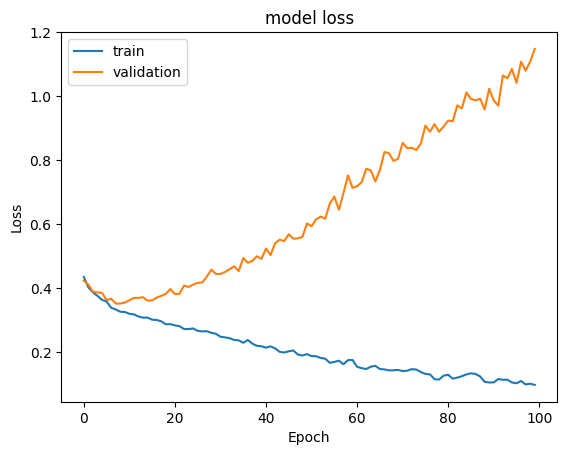

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The lack of improvement in validation loss indicates a potential issue with the learning rate being too high.The model is overfitting, learning rate is too high. To mitigate overfitting, we plan to reduce the learning rate and explore additional regularization techniques

In [ ]:
#Lower learning rate to 0.001
model_2 = create_model(lr=0.001)
history2=model_2.fit(X_train, y_train, batch_size=64, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
88/88 [==============================] - 1s 6ms/step - loss: 0.5221 - accuracy: 0.7550 - val_loss: 0.4544 - val_accuracy: 0.7992
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8100 - val_loss: 0.4314 - val_accuracy: 0.8146
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8216 - val_loss: 0.4226 - val_accuracy: 0.8238
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8275 - val_loss: 0.4203 - val_accuracy: 0.8242
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8332 - val_loss: 0.4116 - val_accuracy: 0.8275
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8388 - val_loss: 0.4090 - val_accuracy: 0.8258
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8409 - val_loss: 0.4053 - val_accuracy: 0.8300
Epoch 8/100
8

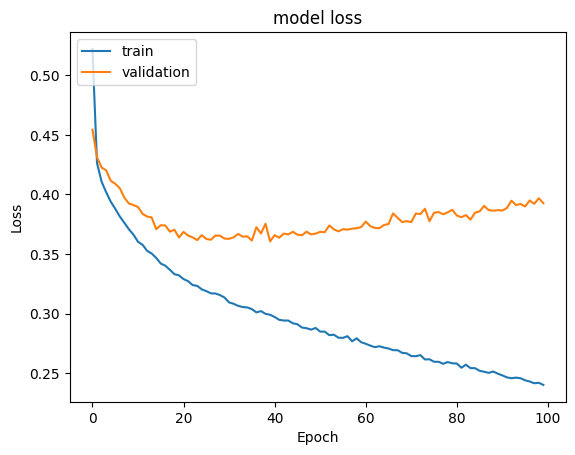

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

After 30 epochs the model is still showing signs of overfitting. To tackle this, we're going to try a slightly higher learning rate and use early stopping normalization technique. These changes are meant to find a better balance and improve the model

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#slightly increasing learning rate
model_2 = create_model(lr=0.0012)

In [ ]:
#implementing early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3)

In [ ]:
# Additionally, we'll lower the batch size to further complement the slight increase in the learning rate
history_3 = model_2.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
175/175 [==============================] - 5s 15ms/step - loss: 0.4485 - accuracy: 0.8057 - val_loss: 0.4321 - val_accuracy: 0.8158
Epoch 2/100
175/175 [==============================] - 1s 6ms/step - loss: 0.4143 - accuracy: 0.8245 - val_loss: 0.4209 - val_accuracy: 0.8167
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4010 - accuracy: 0.8318 - val_loss: 0.4128 - val_accuracy: 0.8233
Epoch 4/100
175/175 [==============================] - 1s 3ms/step - loss: 0.3927 - accuracy: 0.8327 - val_loss: 0.4112 - val_accuracy: 0.8250
Epoch 5/100
175/175 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.8404 - val_loss: 0.4056 - val_accuracy: 0.8271
Epoch 6/100
175/175 [==============================] - 1s 3ms/step - loss: 0.3797 - accuracy: 0.8384 - val_loss: 0.4001 - val_accuracy: 0.8271
Epoch 7/100
175/175 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8425 - val_loss: 0.4000 - val_accuracy: 0.827

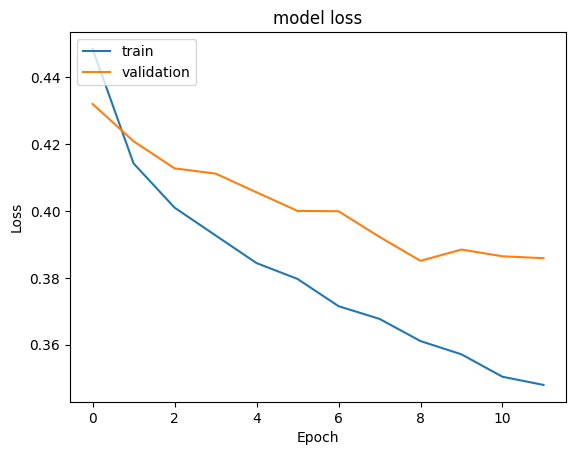

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred=model_2.predict(X_val)

75/75 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[0.2584489 ],
       [0.18451858],
       [0.12049475],
       ...,
       [0.05902554],
       [0.06612599],
       [0.08293088]], dtype=float32)

In [ ]:
y_pred=y_pred>0.5

In [ ]:
recall = recall_score(y_val, y_pred)

In [ ]:
print(recall)

0.39263803680981596


We'll leverage the AUC curve to determine the optimal threshold for our model to improve recall value

175/175 [==============================] - 0s 2ms/step
Best Threshold=0.178455, G-Mean=0.787


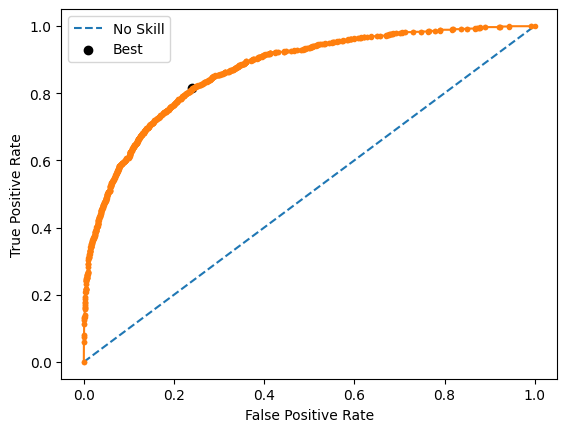

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1911
           1       0.41      0.75      0.53       489

    accuracy                           0.73      2400
   macro avg       0.67      0.74      0.67      2400
weighted avg       0.82      0.73      0.75      2400



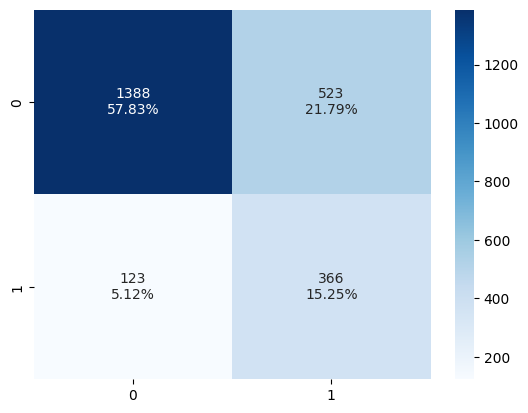

In [ ]:
auc_curve_threhold(model_2, X_train, y_train);

The model performance slightly improved using early stoping, higher learning rate, lower batch size, adam optimizer and calculated best Threshold of 0.178455. We will try to improve model and prevent overfitting  with dropout regularization technique

### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
model_3.add(Dropout(0.4))
model_3.add(Dense(32,activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.0011)

# compiling the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

history_4 = model_3.fit(X_train,y_train,batch_size=32,epochs=70,verbose=1,validation_data=(X_val,y_val), callbacks=es_cb)


Epoch 1/70
175/175 [==============================] - 2s 8ms/step - loss: 0.4974 - val_loss: 0.4396
Epoch 2/70
175/175 [==============================] - 1s 6ms/step - loss: 0.4393 - val_loss: 0.4342
Epoch 3/70
175/175 [==============================] - 1s 6ms/step - loss: 0.4321 - val_loss: 0.4304
Epoch 4/70
175/175 [==============================] - 1s 7ms/step - loss: 0.4242 - val_loss: 0.4259
Epoch 5/70
175/175 [==============================] - 1s 7ms/step - loss: 0.4170 - val_loss: 0.4213
Epoch 6/70
175/175 [==============================] - 1s 6ms/step - loss: 0.4162 - val_loss: 0.4170
Epoch 7/70
175/175 [==============================] - 1s 4ms/step - loss: 0.4137 - val_loss: 0.4142
Epoch 8/70
175/175 [==============================] - 1s 4ms/step - loss: 0.4097 - val_loss: 0.4077
Epoch 9/70
175/175 [==============================] - 1s 4ms/step - loss: 0.3992 - val_loss: 0.4056
Epoch 10/70
175/175 [==============================] - 1s 4ms/step - loss: 0.3970 - val_loss: 0.3985

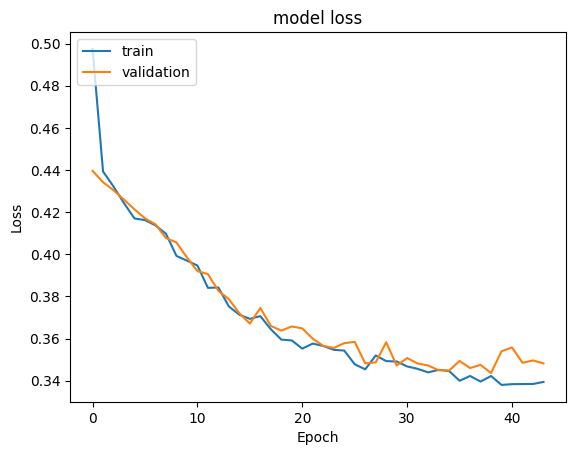

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

175/175 [==============================] - 0s 2ms/step
Best Threshold=0.178369, G-Mean=0.806


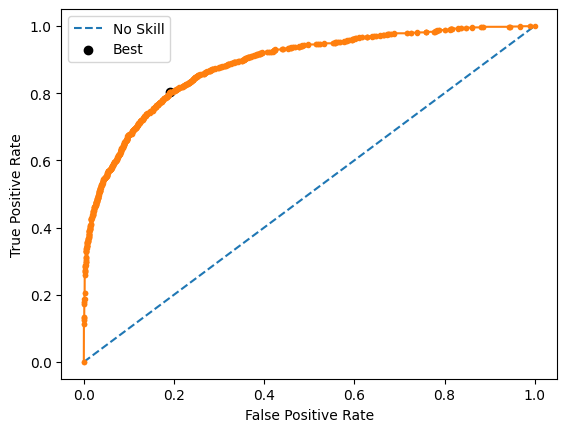

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1911
           1       0.47      0.75      0.58       489

    accuracy                           0.78      2400
   macro avg       0.70      0.77      0.72      2400
weighted avg       0.83      0.78      0.80      2400



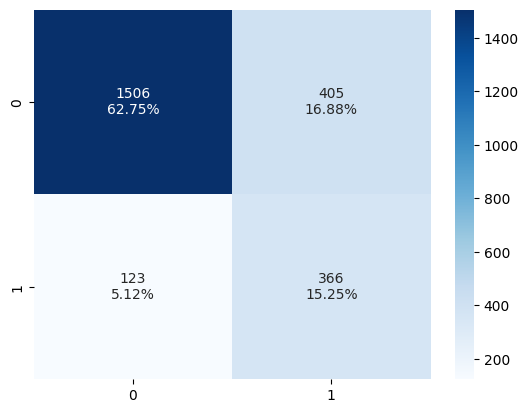

In [ ]:

auc_curve_threhold(model_3, X_train, y_train);


Dropout technique gives us a similar recall value of 0.75%.
F1 score and precision improved

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(lr=0.01):

    #Initializing the neural network
    model = Sequential()
    model.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
pip install scikeras

In [ ]:

from scikeras.wrappers import KerasClassifier

In [ ]:
## Complete the code by calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [ ]:
#Will try to use different batch sizes and different learning rates, Also we will use K-Fold Cross-Validation
param_grid = {
    'batch_size':[36, 40, 64, 120],
     "optimizer__lr": [0.0011, 0.0013, 0.0015, 0.0017, 0.001]}
kfold_splits = 5

In [ ]:
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
156/156 [==============================] - 2s 5ms/step - loss: 0.4602 - accuracy: 0.7909 - val_loss: 0.4419 - val_accuracy: 0.8129


In [ ]:

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Best: 0.808036 using {'batch_size': 36, 'optimizer__lr': 0.0017}


In [ ]:
# create the model  with best learning rate from hyperparameter tuning
model_4=create_model_v2(lr=grid_result.best_params_['optimizer__lr'])
# Printing model summary
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4

In [ ]:
## fit the model  with best batch_size obtained from hyperparameter tuning
history_5=model_4.fit(X_train,y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val), callbacks=[es_cb])

Epoch 1/100
156/156 [==============================] - 3s 8ms/step - loss: 0.5311 - accuracy: 0.7609 - val_loss: 0.4517 - val_accuracy: 0.7962
Epoch 2/100
156/156 [==============================] - 1s 7ms/step - loss: 0.4515 - accuracy: 0.7984 - val_loss: 0.4399 - val_accuracy: 0.7962
Epoch 3/100
156/156 [==============================] - 1s 6ms/step - loss: 0.4429 - accuracy: 0.7989 - val_loss: 0.4354 - val_accuracy: 0.8062
Epoch 4/100
156/156 [==============================] - 2s 11ms/step - loss: 0.4338 - accuracy: 0.8075 - val_loss: 0.4301 - val_accuracy: 0.8163
Epoch 5/100
156/156 [==============================] - 2s 11ms/step - loss: 0.4317 - accuracy: 0.8091 - val_loss: 0.4275 - val_accuracy: 0.8171
Epoch 6/100
156/156 [==============================] - 2s 11ms/step - loss: 0.4190 - accuracy: 0.8163 - val_loss: 0.4232 - val_accuracy: 0.8175
Epoch 7/100
156/156 [==============================] - 2s 11ms/step - loss: 0.4194 - accuracy: 0.8159 - val_loss: 0.4213 - val_accuracy: 0.

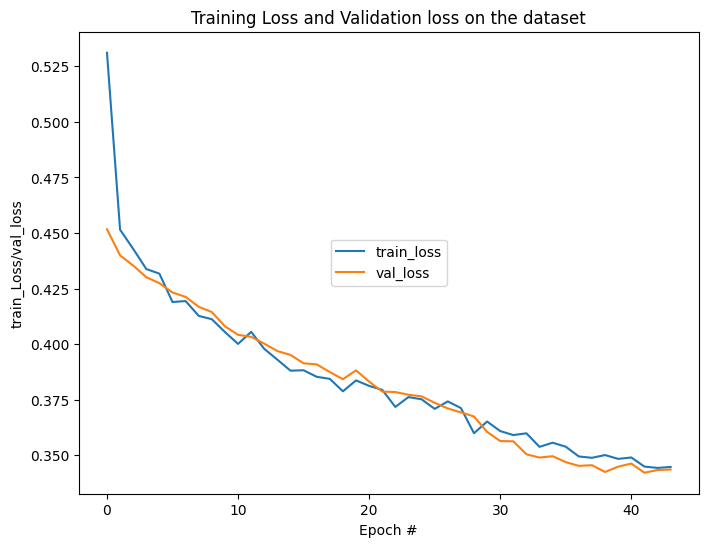

In [ ]:
N =len(history_5.history['loss'])
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_5.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_5.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

175/175 [==============================] - 0s 2ms/step
Best Threshold=0.226515, G-Mean=0.797


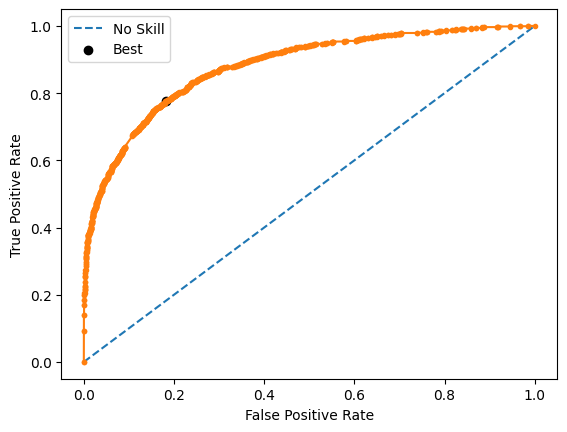

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1911
           1       0.49      0.74      0.59       489

    accuracy                           0.79      2400
   macro avg       0.71      0.77      0.73      2400
weighted avg       0.84      0.79      0.81      2400



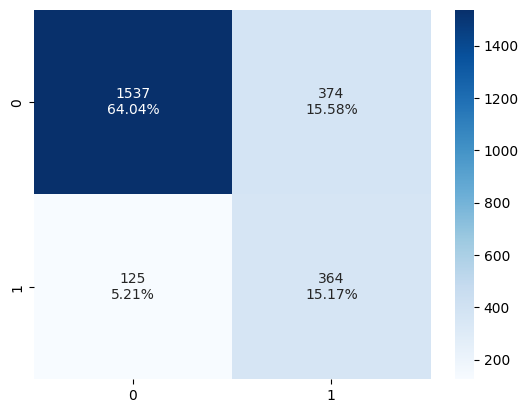

In [ ]:

auc_curve_threhold(model_4, X_train, y_train);

Model 4 with hyperparameters shows similar results

### Model Improvement: Neural Network model with balanced data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=42)

In [ ]:
# Creating a balanced dataset using SMOTE (Synthetic Minority Over-sampling Technique)
#SMOTE generates synthetic samples for the minority class to balance the class distribution
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
print('After UpSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After UpSampling, the shape of train_y: {}\n'.format(y_train_resampled.shape))

After UpSampling, the shape of train_X: (8918, 11)
After UpSampling, the shape of train_y: (8918, 1)



In [ ]:
y_train_resampled.value_counts()

Exited
0         4459
1         4459
dtype: int64

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initilaizing a sequential model
model_5 = Sequential()

# adding a input layer of 32 neurons with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_resampled.shape[1]))

# adding dropout with dropout rate=0.4
model_5.add(Dropout(0.4))
# adding hidden layer with 16 neurons with relu as activation function
model_5.add(Dense(16,activation='relu'))

# adding the dropout withy dropout rate 0.2
model_5.add(Dropout(0.2))

# adding dense layers with 8 neurons
model_5.add(Dense(8,activation='relu'))

# final layer
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Initializing  earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.0013)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_5.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 40, epochs of 100 and callbacks as earlystopping
history_5 = model_5.fit(X_train_resampled,y_train_resampled,batch_size=40,epochs=100,verbose=1,validation_data = (X_val,y_val), callbacks=es_cb)

Epoch 1/100
223/223 [==============================] - 2s 4ms/step - loss: 0.6389 - accuracy: 0.6306 - val_loss: 0.5459 - val_accuracy: 0.7121
Epoch 2/100
223/223 [==============================] - 1s 3ms/step - loss: 0.5769 - accuracy: 0.7111 - val_loss: 0.5570 - val_accuracy: 0.7058
Epoch 3/100
223/223 [==============================] - 1s 3ms/step - loss: 0.5577 - accuracy: 0.7268 - val_loss: 0.5621 - val_accuracy: 0.6983
Epoch 4/100
223/223 [==============================] - 1s 3ms/step - loss: 0.5479 - accuracy: 0.7328 - val_loss: 0.5673 - val_accuracy: 0.6950
Epoch 5/100
223/223 [==============================] - 1s 3ms/step - loss: 0.5370 - accuracy: 0.7363 - val_loss: 0.5775 - val_accuracy: 0.6908
Epoch 6/100
223/223 [==============================] - 1s 3ms/step - loss: 0.5339 - accuracy: 0.7302 - val_loss: 0.5298 - val_accuracy: 0.7221
Epoch 7/100
223/223 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.7411 - val_loss: 0.5368 - val_accuracy: 0.7188

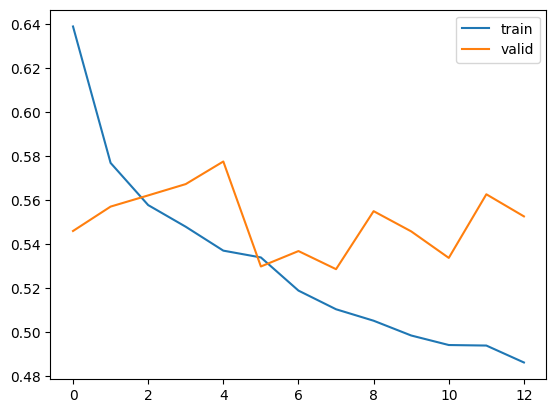

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_5.history)
hist['epoch'] = history_5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

279/279 [==============================] - 0s 1ms/step
Best Threshold=0.576637, G-Mean=0.791


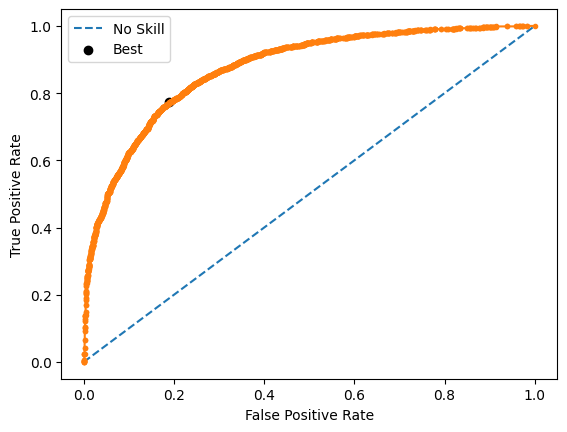

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1911
           1       0.44      0.68      0.54       489

    accuracy                           0.76      2400
   macro avg       0.67      0.73      0.69      2400
weighted avg       0.81      0.76      0.78      2400



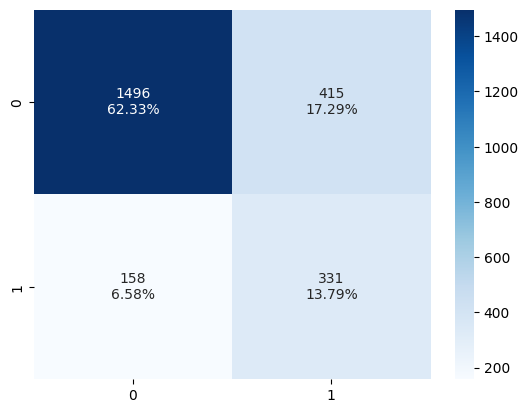

In [ ]:
auc_curve_threhold(model_5, X_train_resampled, y_train_resampled);

The model appears to be overfitting, as the recall value has also decreased

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [ ]:


def create_model(learning_rate=0.1):

  	# Create an Adam optimizer with the given learning rate
    opt = Adam(learning_rate)
    model = Sequential()
    model.add(Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))

  	# Compile your model with your optimizer, loss, and metrics
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
# Create a KerasClassifier
keras_classifier2 = KerasClassifier(create_model)

# Define the parameters to try out
params = { 'batch_size': [32, 40, 64, 128],
          'epochs': [50, 70, 100], 'optimizer__learning_rate': [0.001, 0.0013, 0.0015, 0.0017]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(keras_classifier2, params, cv = KFold(5))

In [ ]:
random_search.fit(X_train, y_train, verbose=0)

18/18 [==============================] - 0s 2ms/step


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KerasClassifier(model=<function create_model at 0x7a6f1d306950>),
                   param_distributions={'batch_size': [32, 40, 64, 128],
                                        'epochs': [50, 70, 100],
                                        'optimizer__learning_rate': [0.001,
                                                                     0.0013,
                                                                     0.0015,
                                                                     0.0017]})

In [ ]:

# Summarize results
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']

Best: 0.804286 using {'optimizer__learning_rate': 0.0013, 'epochs': 50, 'batch_size': 128}


In [ ]:
random_search.best_params_

{'optimizer__learning_rate': 0.0013, 'epochs': 50, 'batch_size': 128}

In [ ]:
model_6=create_model(learning_rate=random_search.best_params_['optimizer__learning_rate'])

model_6.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 64)                768       
                                                                 
 dropout_102 (Dropout)       (None, 64)                0         
                                                                 
 dense_205 (Dense)           (None, 32)                2080      
                                                                 
 dropout_103 (Dropout)       (None, 32)                0         
                                                                 
 dense_206 (Dense)           (None, 8)                 264       
                                                                 
 dense_207 (Dense)           (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 

In [ ]:
history_7=model_6.fit(X_train, y_train, epochs = random_search.best_params_['epochs'], batch_size = random_search.best_params_['batch_size'], verbose=1,validation_data = (X_val,y_val))

Epoch 1/50
44/44 [==============================] - 4s 32ms/step - loss: 0.5828 - accuracy: 0.7068 - val_loss: 0.4741 - val_accuracy: 0.7962
Epoch 2/50
44/44 [==============================] - 0s 10ms/step - loss: 0.4686 - accuracy: 0.7968 - val_loss: 0.4486 - val_accuracy: 0.7967
Epoch 3/50
44/44 [==============================] - 1s 13ms/step - loss: 0.4501 - accuracy: 0.7986 - val_loss: 0.4409 - val_accuracy: 0.7987
Epoch 4/50
44/44 [==============================] - 1s 13ms/step - loss: 0.4421 - accuracy: 0.7993 - val_loss: 0.4368 - val_accuracy: 0.8017
Epoch 5/50
44/44 [==============================] - 1s 15ms/step - loss: 0.4375 - accuracy: 0.8021 - val_loss: 0.4343 - val_accuracy: 0.8025
Epoch 6/50
44/44 [==============================] - 1s 16ms/step - loss: 0.4325 - accuracy: 0.8066 - val_loss: 0.4339 - val_accuracy: 0.8083
Epoch 7/50
44/44 [==============================] - 0s 9ms/step - loss: 0.4296 - accuracy: 0.8087 - val_loss: 0.4303 - val_accuracy: 0.8096
Epoch 8/50
44/

175/175 [==============================] - 0s 2ms/step
Best Threshold=0.190750, G-Mean=0.799


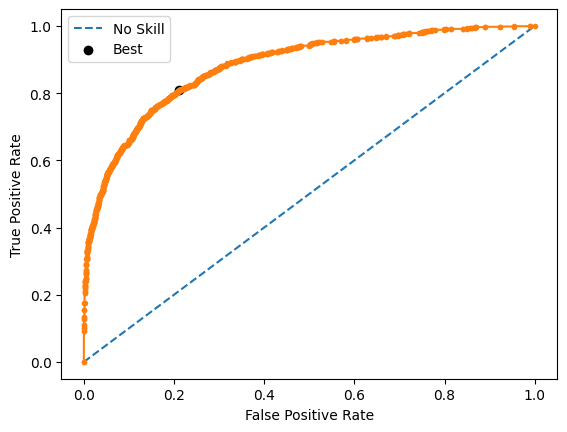

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1911
           1       0.46      0.77      0.57       489

    accuracy                           0.77      2400
   macro avg       0.69      0.77      0.71      2400
weighted avg       0.83      0.77      0.79      2400



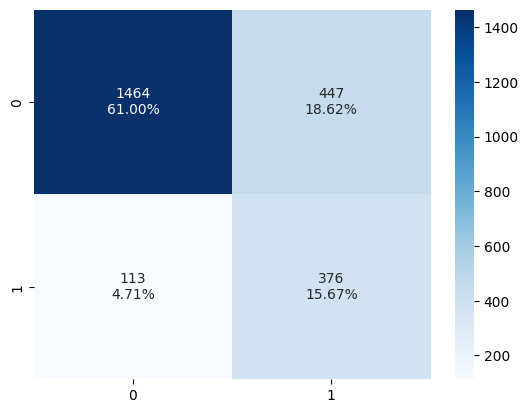

In [ ]:
auc_curve_threhold(model_6, X_train, y_train);

Final Model

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

175/175 [==============================] - 0s 1ms/step
Best Threshold=0.190750, G-Mean=0.799


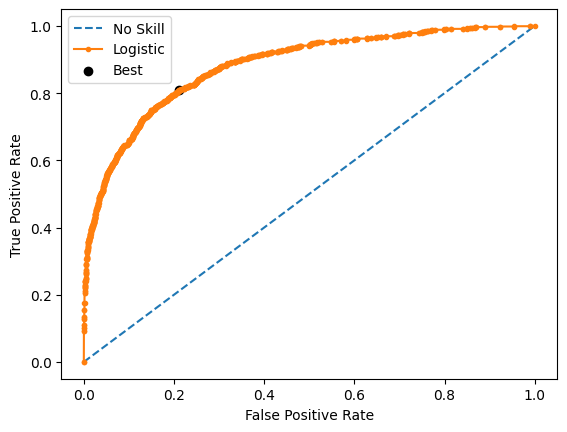

In [ ]:
# predict probabilities using the best model
yhat = model_6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
 #Predict the X_test data using the best model
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
## Complete the code to obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.78      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

We trained six different models, making adjustments to the architecture and optimizer settings. Additionally, we employed augmentation techniques to address the imbalance in the dataset, generating more data. Model 6, which underwent hyperparameter tuning with cross-validation, demonstrated the best performance for the recall metric on the test data.  However,  precision is low. Exploring the creation of baskets for balance could potentially improve the model's effectiveness.

It's crucial to consistently monitor the model's performance and make updates as new data becomes available. This practice ensures the model stays relevant and effective over time

Business Recomendation:
    Regularly monitor customer demographics, balances, and age-related patterns to stay responsive to changing customer behavior.
    Establish effective communication channels to gather feedback from customers who have exited.
    Investigate the reasons behind higher balances among customers who have exited. Consider offering tailored financial solutions, promotions, or loyalty programs to retain high-balance customers.
   Address the slightly higher exit rate by analyzing and understanding the specific factors contributing to customer churn in Germany. Implement targeted retention strategies or product enhancements to mitigate churn

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Bank Churn Prediction.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/INN_Learner_Notebook_Full_code_version1.ipynb to html
[NbConvertApp] Writing 2624010 bytes to /content/drive/MyDrive/Colab Notebooks/INN_Learner_Notebook_Full_code_version1.html


___